This is how much space the figure will take up on letter paper


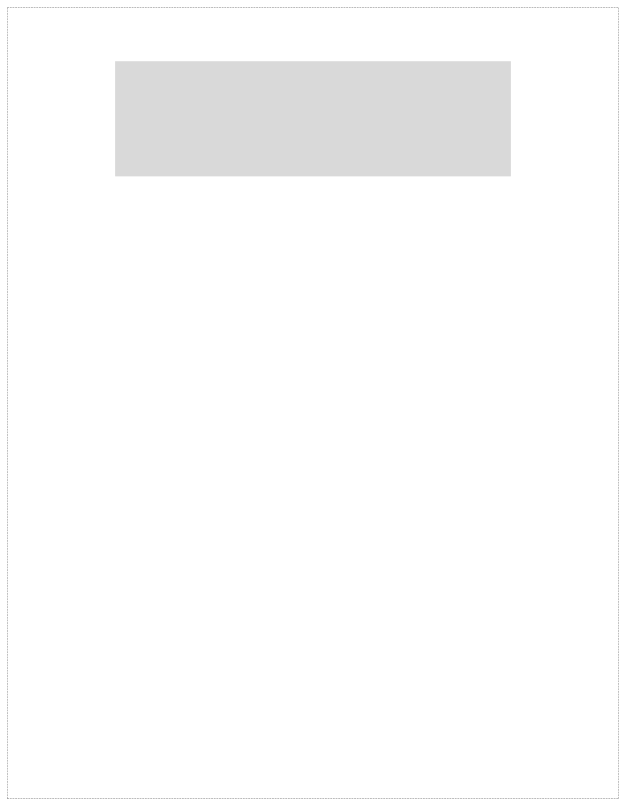

In [1]:
__PRODUCTION__ = 0
__NAME__       = 'er-inter'
__WIDTH__      = 5.5  # NeurIPS 2021 text box width
__HEIGHT__     = 1.6

if __PRODUCTION__:
    from mplmagic import pgf
else:
    from mplmagic import svg

from mplmagic.util import SuperFigure, SuperAxes, size_hint
import matplotlib.pyplot as plt

print('This is how much space the figure will take up on letter paper')
size_hint(__WIDTH__, __HEIGHT__, margin_left=0.5 * (8.5 - __WIDTH__));

In [2]:
import functools
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim
import networkx as nx
import pickle
from sklearn import metrics

from symfac.experimental import RBFExpansionV2

In [3]:
n=40
p=0.5
G = nx.generators.random_graphs.gnp_random_graph(n, p, seed = 1)
K00 = nx.to_numpy_array(G)
K00 = torch.tensor(K00, dtype=torch.float32)

In [4]:
def find_svd(K0):
    U, S, V = np.linalg.svd(K0.detach().numpy())
    s_vals = []
    for k in range(1, min(K0.size()[0], K0.size()[1]) + 1):
        s_vals.append(round(float(F.mse_loss(torch.tensor((U[:, :k] * S[None, :k]) @ V[:k, :]), K0)), 8)
    )
    return s_vals

100%|██████████| 20000/20000 [00:30<00:00, 660.37it/s]
/home/symfac/.local/lib/python3.8/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/symfac/.local/lib/python3.8/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)


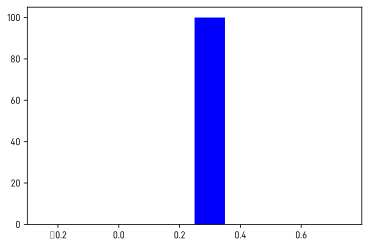

0.2492437


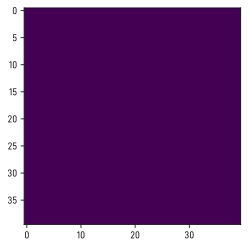

100%|██████████| 20000/20000 [00:38<00:00, 513.00it/s]


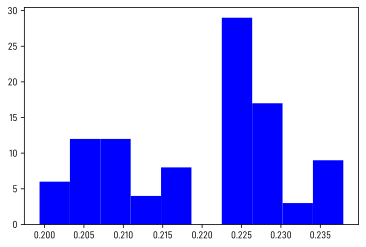

0.199369


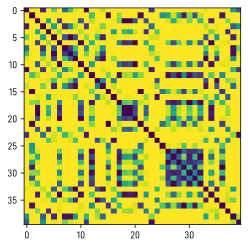

100%|██████████| 20000/20000 [00:35<00:00, 563.28it/s]


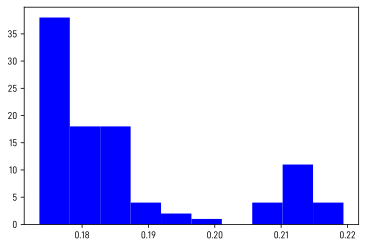

0.1735681


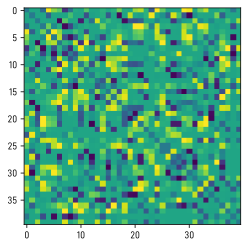

100%|██████████| 20000/20000 [00:39<00:00, 512.23it/s]


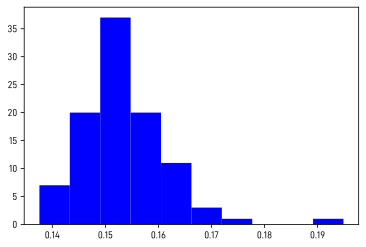

0.1375639


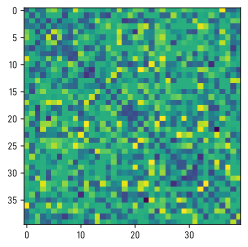

100%|██████████| 20000/20000 [00:38<00:00, 513.49it/s]


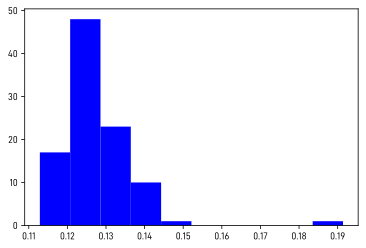

0.1128706


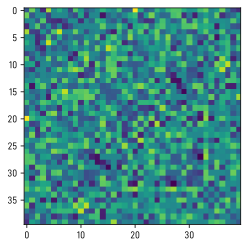

100%|██████████| 20000/20000 [00:38<00:00, 525.74it/s]


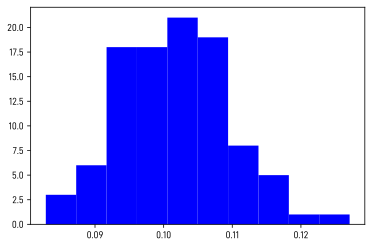

0.0828325


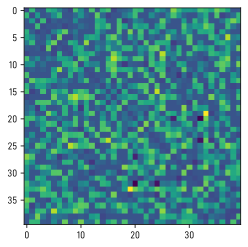

100%|██████████| 20000/20000 [00:39<00:00, 510.93it/s]


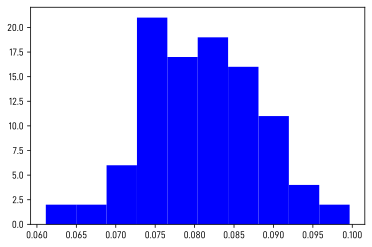

0.0611272


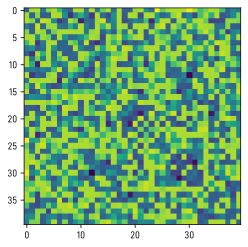

100%|██████████| 20000/20000 [00:38<00:00, 515.89it/s]


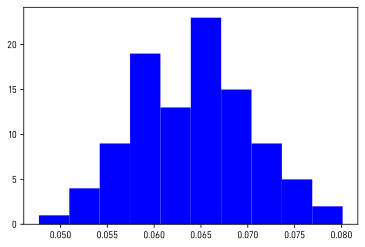

0.0476996


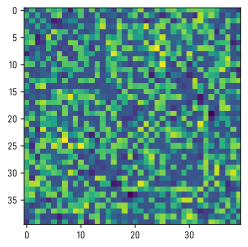

100%|██████████| 20000/20000 [00:33<00:00, 591.68it/s]


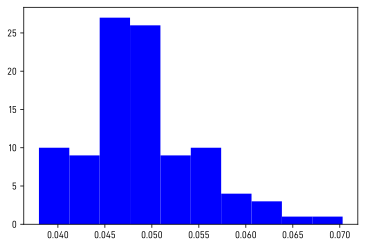

0.0379837


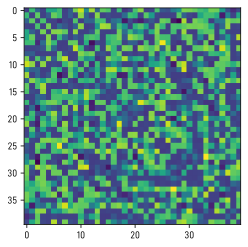

100%|██████████| 20000/20000 [00:34<00:00, 582.01it/s]


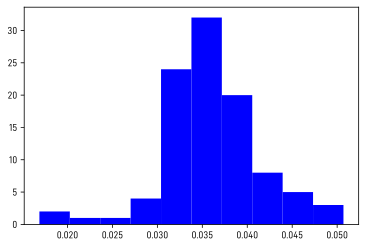

0.0168776


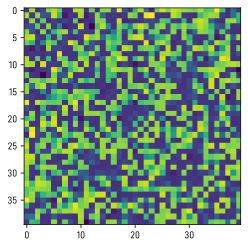

100%|██████████| 20000/20000 [00:34<00:00, 579.01it/s]


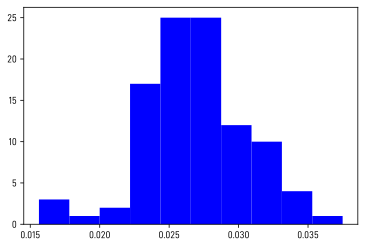

0.0156243


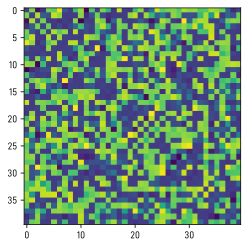

100%|██████████| 20000/20000 [00:34<00:00, 571.86it/s]


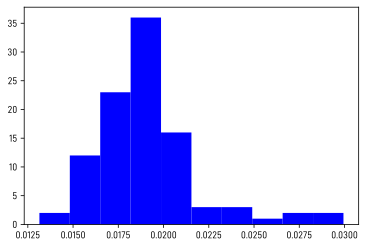

0.0131407


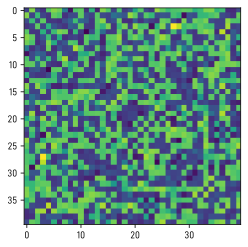

100%|██████████| 20000/20000 [00:35<00:00, 566.56it/s]


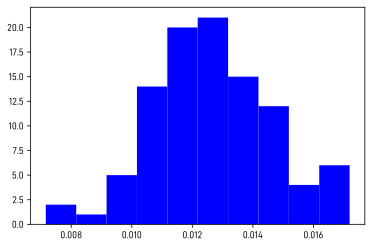

0.0071606


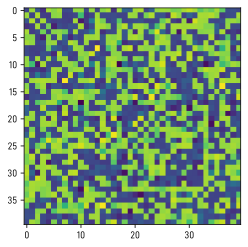

100%|██████████| 20000/20000 [00:35<00:00, 556.06it/s]


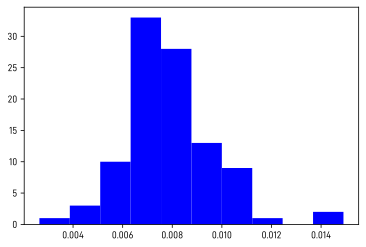

0.0026433


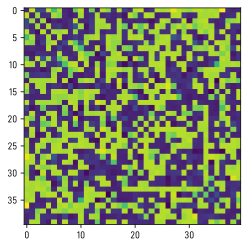

100%|██████████| 20000/20000 [00:36<00:00, 549.04it/s]


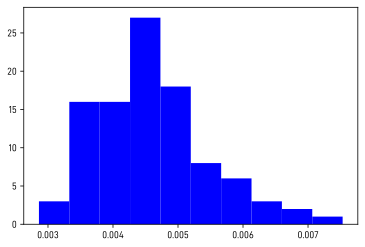

0.0028609


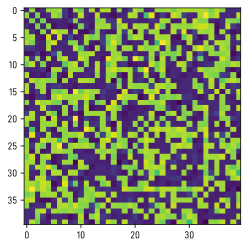

100%|██████████| 20000/20000 [00:36<00:00, 542.42it/s]


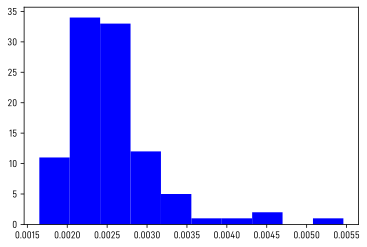

0.0016502


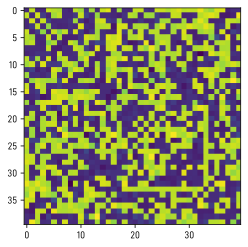

100%|██████████| 20000/20000 [00:37<00:00, 526.93it/s]


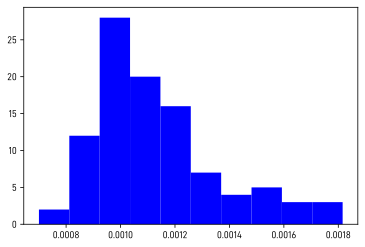

0.0007002


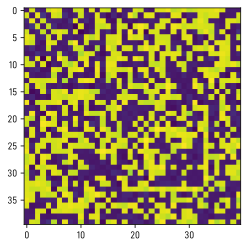

100%|██████████| 20000/20000 [00:41<00:00, 482.49it/s]


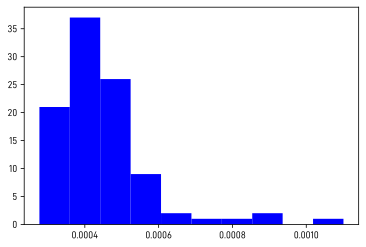

0.000277


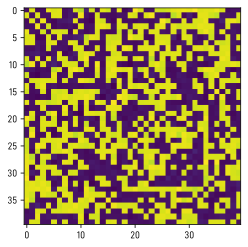

100%|██████████| 20000/20000 [00:40<00:00, 497.35it/s]


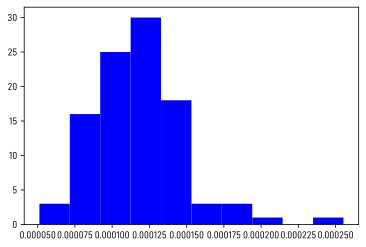

5.12e-05


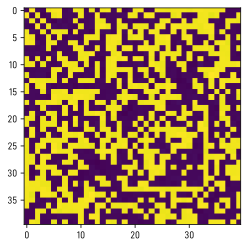

100%|██████████| 20000/20000 [00:41<00:00, 476.93it/s]


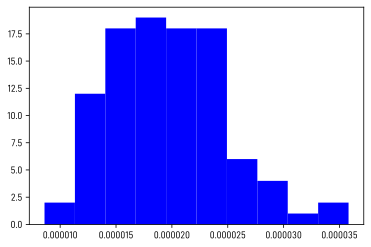

8.6e-06


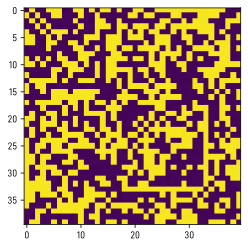

100%|██████████| 20000/20000 [00:42<00:00, 469.69it/s]


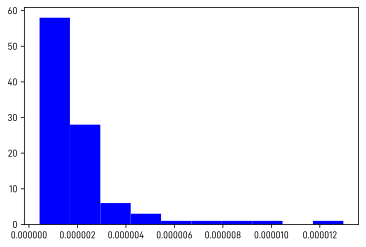

4e-07


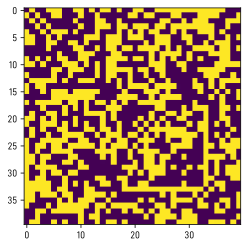

[0.2492437, 0.199369, 0.1735681, 0.1375639, 0.1128706, 0.0828325, 0.0611272, 0.0476996, 0.0379837, 0.0168776, 0.0156243, 0.0131407, 0.0071606, 0.0026433, 0.0028609, 0.0016502, 0.0007002, 0.000277, 5.12e-05, 8.6e-06, 4e-07]


In [6]:
errors = []
bs=100
for k in range(21):
    u0=1/1000*torch.randn([bs, len(K00), k]) 
    a=torch.randn([bs, k], device="cuda")
    b=torch.randn([bs], device="cuda")
    fac = RBFExpansionV2(k=k, batch_size=bs, max_steps=20000)
    fac.fith(
        K00,
        u0=u0,
        a0=a,
        b0=b
    )
    plt.hist(fac.report.loss_best, color='b', label='1')
    plt.show()

    plt.show()
    error = fac.report.loss_best
    er = round(float(torch.min(error).cpu().detach().numpy()), 7)
    print(er)
    errors.append(er)
    plt.imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))
    plt.show()
    #open('er_{0}.pickle'.format(k), 'wb').write(pickle.dumps(fac.optimum.x))
print(errors)

In [7]:
er_losses_old = pickle.loads(open('er_losses.pickle', 'rb').read())

In [9]:
er_losses_old

[[0.199369,
  0.1710584,
  0.1435228,
  0.1122767,
  0.0826196,
  0.0591272,
  0.027997,
  0.0214275,
  0.0202333,
  0.0163644,
  0.0122734,
  0.008489,
  0.0056005,
  0.0031458,
  0.0016184,
  0.0007505,
  0.0002907,
  5.28e-05,
  8.7e-06,
  4e-07,
  0.0],
 [0.2363018,
  0.2120082,
  0.1927711,
  0.1741255,
  0.1590976,
  0.1443937,
  0.131749,
  0.1193682,
  0.1084128,
  0.0979427,
  0.0877641,
  0.0787542,
  0.0700078,
  0.0615597,
  0.0542133,
  0.0471951,
  0.041514,
  0.0365852,
  0.0318286,
  0.0272416,
  0.0228975,
  0.0188536,
  0.0154584,
  0.0128366,
  0.0109367,
  0.0090615,
  0.0074274,
  0.006122,
  0.0048382,
  0.0037293,
  0.0027037,
  0.0018504,
  0.0011752,
  0.0006553,
  0.0004387,
  0.0002926,
  0.0001832,
  7.96e-05,
  3.9e-05,
  0.0]]

100%|██████████| 50000/50000 [01:35<00:00, 523.95it/s]
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], 

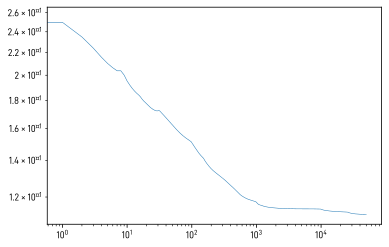

0.1115748


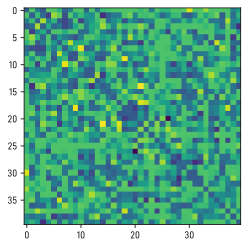

  3%|▎         | 1395/50000 [00:02<01:29, 540.83it/s]

In [ ]:
errors = []
bs=100
for k in range(4,21):
    u0=1/1000*torch.randn([bs, len(K00), k]) 
    a=torch.randn([bs, k], device="cuda")
    b=torch.randn([bs], device="cuda")
    fac = RBFExpansionV2(k=k, batch_size=bs, max_steps=50000, algorithm='Adagrad')
    fac.fith(
        K00,
        u0=u0,
        a0=a,
        b0=b
    )
    plt.loglog(
    fac.report.loss_history_ticks,
    fac.report.loss_history.min(axis=1)
    )
    plt.show()

    plt.show()
    error = fac.report.loss_best
    er = round(float(torch.min(error).cpu().detach().numpy()), 7)
    print(er)
    errors.append(er)
    plt.imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))
    plt.show()
    #open('er_{0}.pickle'.format(k), 'wb').write(pickle.dumps(fac.optimum.x))
print(errors)

In [13]:
errors

[0.2011059,
 0.1714691,
 0.138375,
 0.1092523,
 0.0875815,
 0.0630394,
 0.0522571,
 0.0369417,
 0.0272474,
 0.0182623,
 0.0133177]

In [11]:
open('er_losses.pickle', 'wb').write(pickle.dumps([errors, s_vals]))

573

In [129]:
errs,s_vals = pickle.load(open("er_losses.pickle", "rb"))

In [10]:
len(errors)

21

In [44]:
errs = [round(float(errors[i].cpu().detach().numpy()), 7) for i in range(len(errors))]

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

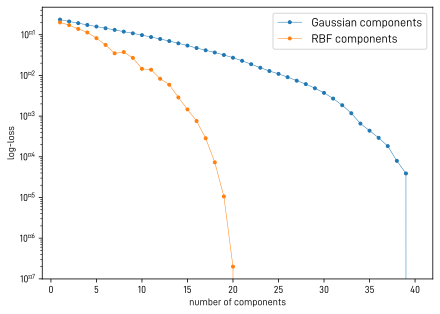

In [106]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, K00.shape[0]+1), s_vals, '.-', label='Gaussian components')
plt.plot(range(1, len(errs)+1), errs, '.-',label='RBF components')
plt.ylabel('log-loss')
plt.yscale('log')
plt.xlabel('number of components')
plt.legend(loc='upper right', fontsize=12)
#plt.title('Graph kernel 256*256')
plt.show()

In [6]:
s_vals = []
U0, S0, V0 = np.linalg.svd(K00.detach().numpy())
for s in range(1, K00.shape[0]+1):
    s_vals.append(round(float(F.mse_loss(torch.tensor((U0[:, :s] * S0[None, :s]) @ V0[:s, :]), K00)),7))

In [7]:
s_vals

[0.2363018,
 0.2120082,
 0.1927711,
 0.1741255,
 0.1590976,
 0.1443937,
 0.131749,
 0.1193682,
 0.1084128,
 0.0979427,
 0.0877641,
 0.0787542,
 0.0700078,
 0.0615597,
 0.0542133,
 0.0471951,
 0.041514,
 0.0365852,
 0.0318286,
 0.0272416,
 0.0228975,
 0.0188536,
 0.0154584,
 0.0128366,
 0.0109367,
 0.0090615,
 0.0074274,
 0.006122,
 0.0048382,
 0.0037293,
 0.0027037,
 0.0018504,
 0.0011752,
 0.0006553,
 0.0004387,
 0.0002926,
 0.0001832,
 7.96e-05,
 3.9e-05,
 0.0]

Rank 2 approximation comparison

In [56]:
def threshold(alpha, array):
    tresholded_array = torch.randn(array.shape)
    tresholded_array[array < alpha] = 0
    tresholded_array[array >= alpha] = 1
    return tresholded_array

100%|██████████| 10000/10000 [00:26<00:00, 373.46it/s]


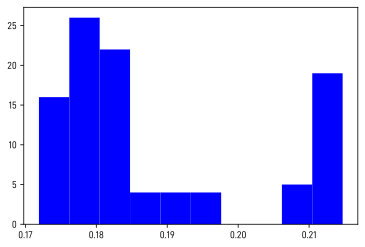

0.1719097


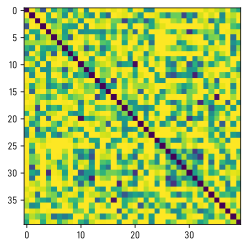

[0.1719097]


In [30]:
errors = []
bs=100
for k in range(2,3):
    u0=1/1000*torch.randn([bs, len(K00), k]) 
    a=torch.randn([bs, k], device="cuda")
    b=torch.randn([bs], device="cuda")
    fac = RBFExpansionV2(k=k, batch_size=bs, max_steps=10000)
    fac.fith(
        K00,
        u0=u0,
        a0=a,
        b0=b
    )
    plt.hist(fac.report.loss_best, color='b', label='1')
    plt.show()

    plt.show()
    error = fac.report.loss_best
    er = round(float(torch.min(error).cpu().detach().numpy()), 7)
    print(er)
    errors.append(er)
    plt.imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))
    plt.show()
    open('er_{0}.pickle'.format(k), 'wb').write(pickle.dumps(fac.optimum.x))
print(errors)

In [31]:
rank2_approx = fac.optimum(runs=torch.argmin(fac.report.loss_best))

In [32]:
svd2_approx = torch.tensor((U0[:, :2] * S0[None, :2]) @ V0[:2, :])

In [33]:
from sklearn import metrics
y = K00.numpy().flatten()
pred = rank2_approx.numpy().flatten()
pred_svd = svd2_approx.numpy().flatten()

fpr2, tpr2, thresholds = metrics.roc_curve(y, pred)
print(metrics.auc(fpr2, tpr2))
fpr_svd2, tpr_svd2, thresholds2 = metrics.roc_curve(y, pred_svd)
print(metrics.auc(fpr_svd2, tpr_svd2))

0.8117461571253041
0.7236390079991976


<function matplotlib.pyplot.show(*args, **kw)>

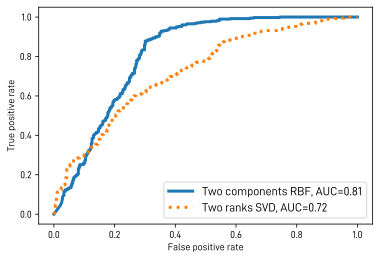

In [34]:
plt.plot(fpr2, tpr2, label='Two components RBF, AUC=0.81',  linewidth=3, linestyle='-')
plt.plot(fpr_svd2, tpr_svd2, label='Two ranks SVD, AUC=0.72',  linewidth=3, linestyle=':')
plt.legend(loc='lower right', fontsize=12)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show


In [35]:
open('er_auc_2.pickle', 'wb').write(pickle.dumps([fpr2, tpr2, fpr_svd2, tpr_svd2]))

12977

In [35]:
open('er_rbf2_approx.pickle', 'wb').write(pickle.dumps(fac.optimum(runs=torch.argmin(fac.report.loss_best))))

6802

Rank 2 approximation comparison

100%|██████████| 10000/10000 [00:25<00:00, 388.68it/s]


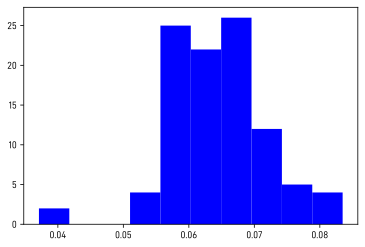

0.0371118


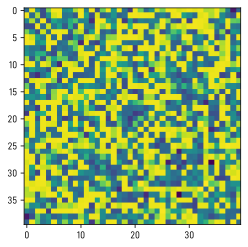

[0.0371118]


In [15]:
errors = []
bs=100
for k in range(7,8):
    u0=1/1000*torch.randn([bs, len(K00), k]) 
    a=torch.randn([bs, k], device="cuda")
    b=torch.randn([bs], device="cuda")
    fac = RBFExpansionV2(k=k, batch_size=bs, max_steps=10000)
    fac.fith(
        K00,
        u0=u0,
        a0=a,
        b0=b
    )
    plt.hist(fac.report.loss_best, color='b', label='1')
    plt.show()

    plt.show()
    error = fac.report.loss_best
    er = round(float(torch.min(error).cpu().detach().numpy()), 7)
    print(er)
    errors.append(er)
    plt.imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))
    plt.show()
    #open('er_{0}.pickle'.format(k), 'wb').write(pickle.dumps(fac.optimum.x))
print(errors)

In [16]:
rank7_approx = fac.optimum(runs=torch.argmin(fac.report.loss_best))

In [18]:
svd7_approx = torch.tensor((U0[:, :7] * S0[None, :7]) @ V0[:7, :])

In [24]:
y = K00.numpy().flatten()

In [26]:
pred_7 = rank7_approx.numpy().flatten()
pred_svd_7 = svd7_approx.numpy().flatten()

fpr, tpr, thresholds = metrics.roc_curve(y, pred_7)
print(metrics.auc(fpr, tpr))
fpr_svd7, tpr_svd7, thresholds_svd7 = metrics.roc_curve(y, pred_svd_7)
print(metrics.auc(fpr_svd7, tpr_svd7))

0.9896499410717421
0.9072757591714937


<function matplotlib.pyplot.show(*args, **kw)>

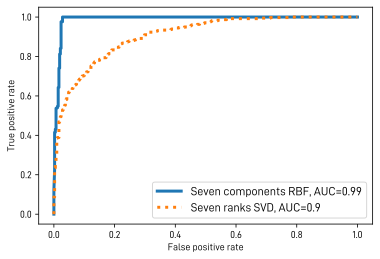

In [28]:
plt.plot(fpr, tpr, label='7 components RBF, AUC=0.99',  linewidth=3, linestyle='-')
plt.plot(fpr_svd7, tpr_svd7, label='7 ranks SVD, AUC=0.9',  linewidth=3, linestyle=':')
plt.legend(loc='lower right', fontsize=12)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show

In [29]:
open('er_auc_7.pickle', 'wb').write(pickle.dumps([fpr, tpr, fpr_svd7, tpr_svd7]))

8241

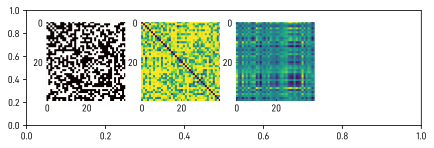

In [124]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__)))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.05
dx = 0.24
w = 0.2
axs = [
    fig.make_axes(
        left=x0 + dx * i,
        width=w,
        top=0.1,
        width_to_height=1.0,
        style='modern'
    ) for i in range(3)
]

axs[1].imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))
axs[0].imshow(K00, cmap='hot', interpolation='nearest')
axs[2].imshow(svd2_approx)


if __PRODUCTION__:
    fig.savefig(f'pgf/{__NAME__}.pgf')
else:
    fig.savefig(f'svg/{__NAME__}.svg')
plt.show()

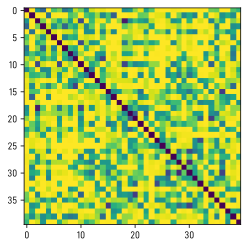

In [111]:
 plt.imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))

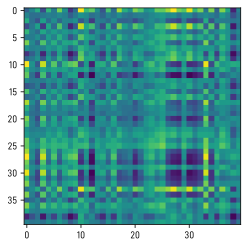

In [122]:
 plt.imshow(svd2_approx)

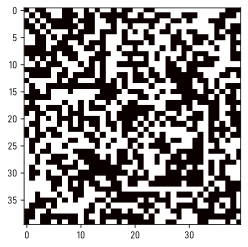

In [113]:
plt.imshow(K00, cmap='hot', interpolation='nearest')
plt.show()

In [121]:
svd1_approx = torch.tensor((U0[:, :1] * S0[None, :1]) @ V0[:1, :])

In [112]:
round(float(torch.min(error).cpu().detach().numpy()), 7)

0.1717081

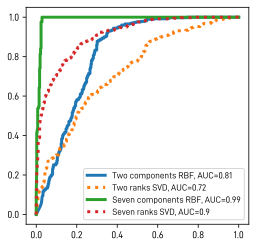

In [20]:
fig = plt.figure(figsize=plt.figaspect(1))
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 1, 1)

ax.plot(fpr2, tpr2, label='Two components RBF, AUC=0.81',  linewidth=3, linestyle='-')
ax.plot(fpr_svd2, tpr_svd2, label='Two ranks SVD, AUC=0.72',  linewidth=3, linestyle=':')
ax.plot(fpr7, tpr7, label='Seven components RBF, AUC=0.99',  linewidth=3, linestyle='-')
ax.plot(fpr_svd7, tpr_svd7, label='Seven ranks SVD, AUC=0.9',  linewidth=3, linestyle=':')
ax.legend(loc='lower right', fontsize=9)


plt.show()

In [8]:
fpr2, tpr2, fpr_svd2, tpr_svd2 = pickle.load(open('er_auc_2.pickle', "rb"))
fpr7, tpr7, fpr_svd7, tpr_svd7 = pickle.load(open('er_auc_7.pickle', "rb"))

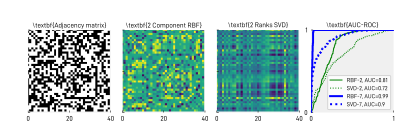

In [40]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__), dpi=300))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.05
dx = 0.24
w = 0.21
axs = [
    fig.make_axes(
        left=x0 + dx * i,
        width=w,
        top=0.2,
        width_to_height=1.0,
        style='modern'
    ) for i in range(4)
]


image_style = dict(
    cmap='viridis'
)
axs[0].imshow(K00, cmap='Greys',  interpolation='nearest')
axs[1].imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)), **image_style)
axs[2].imshow(torch.tensor((U0[:, :2] * S0[None, :2]) @ V0[:2, :]),**image_style)
axs[3].plot(fpr2, tpr2, label='RBF-2, AUC=0.81',  linewidth=1, linestyle='-', color='g')
axs[3].plot(fpr_svd2, tpr_svd2, label='SVD-2, AUC=0.72',  linewidth=1, linestyle=':', color='g')
axs[3].plot(fpr7, tpr7, label='RBF-7, AUC=0.99',  linewidth=2, linestyle='-', color='b')
axs[3].plot(fpr_svd7, tpr_svd7, label='SVD-7, AUC=0.9',  linewidth=2, linestyle=':', color='b')


title_style = dict(
    fontsize=7,
    y=1.02,
    va='top'
)
tick_style = dict(
    fontsize=7,
)
label_style = dict(
    fontsize=8,
    labelpad=0.75,
)


for i in range(4):
    if i != 3:
        ticks = [0, 20, 40]
        axs[i].set_xbound(lower=0, upper=40)
        axs[i].set_ybound(lower=0, upper=40)
    else:
        ticks = [0, 1]
        axs[i].set_xbound(lower=0, upper=1)
        axs[i].set_ybound(lower=0, upper=1)
    axs[i].set_xticks(ticks)
    axs[i].set_yticks(ticks)
    axs[i].set_xticklabels(['%d' % x for x in ticks], **tick_style)
    if i == 3:
        axs[i].set_yticklabels(['%d' % y for y in ticks], **tick_style)
    else:
        axs[i].set_yticklabels([])
   
axs[0].set_title(r'\textbf{Adjacency matrix}', **title_style)
axs[1].set_title(r'\textbf{2 Component RBF}', **title_style)
axs[2].set_title(r'\textbf{2 Ranks SVD}', **title_style)
axs[3].set_title(r'\textbf{AUC-ROC}', **title_style)
axs[3].legend(loc='lower right', fontsize=6)


if __PRODUCTION__:
    fig.savefig(f'pgf/{__NAME__}.pgf', dpi=300)
else:
    fig.savefig(f'svg/{__NAME__}.svg', dpi=300)
plt.show()

In [41]:
!make -f Makefile.figures fig-"$__NAME__".pdf 2>&1 | tail -n 1

Successfully created fig-er-inter.pdf


In [ ]:
tick_style = dict(
    fontsize=7,
)
label_style = dict(
    fontsize=8,
    labelpad=0.75,
)
for i, ax in enumerate(axs):
    ticks = [0, 1]
    ax.set_xbound(lower=0, upper=1)
    ax.set_ybound(lower=0, upper=1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(['%d' % x for x in ticks], **tick_style)
    if i == 0:
        ax.set_yticklabels(['%d' % y for y in ticks], **tick_style)
        ax.set_ylabel(r'\textbf{Learned embedding}', **label_style)
    else:
        ax.set_yticklabels([])
    ax.set_xlabel(r'\textbf{Ground truth}', **label_style)